In [1]:
import pandas as pd 
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import shap
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K
# Train-Test
from sklearn.model_selection import train_test_split
# Scaling data
from sklearn.preprocessing import StandardScaler
# Classification Report
from sklearn.metrics import classification_report

pd.options.mode.chained_assignment = None  # default='warn'

2023-02-26 12:29:59.991199: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
shap.initjs() ## how?

In [3]:
sns.set(context='talk', style='white', rc={'figure.facecolor':'white'}, font_scale=1)
sns.set_style('ticks')

# read in data

In [4]:
first_trimester_data = pd.read_csv("first_trimester_data.txt", sep="\t").T
first_trimester_diseases = pd.read_csv("first_trimester_diseases.txt", sep="\t")
first_trimester_data["disease"] = first_trimester_diseases["disease"].values
first_trimester_data

,0,1,2,3,4,5,6,7,8,9,...,57727,57728,57729,57730,57731,57732,57733,57734,57735,disease
2,0,1,0,0,0,0,0,0,0,0,...,0,17,0,0,0,7,132,1,0,Preeclampsia
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,47,0,0,Preeclampsia
5,1,1,0,0,6,0,0,0,0,0,...,0,13,2,0,0,2,76,0,0,Preeclampsia
9,1,0,0,0,0,0,0,0,0,0,...,0,47,0,0,0,0,30,0,0,Preeclampsia
20,0,0,0,0,0,0,0,0,0,0,...,0,28,0,0,0,10,111,11,0,Preeclampsia
22,0,2,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,65,0,0,Preeclampsia
25,0,0,0,0,3,0,0,0,0,0,...,0,26,0,0,0,0,160,0,0,Preeclampsia
27,0,0,0,0,0,0,0,0,0,0,...,0,11,0,0,0,0,83,0,0,Preeclampsia
43,0,5,0,0,0,0,0,0,0,1,...,0,24,0,0,0,0,65,0,0,Gestational-Diabetes
44,11,0,0,0,0,0,0,0,0,0,...,0,36,0,0,0,4,95,1,0,Gestational-Diabetes


In [5]:
second_trimester_data = pd.read_csv("second_trimester_data.txt", sep="\t").T
second_trimester_diseases = pd.read_csv("second_trimester_diseases.txt", sep="\t")
second_trimester_data["disease"] = second_trimester_diseases["disease"].values
second_trimester_data

,0,1,2,3,4,5,6,7,8,9,...,57727,57728,57729,57730,57731,57732,57733,57734,57735,disease
0,3,9,0,0,0,0,0,0,0,0,...,0,45,3,0,0,0,135,0,0,Preeclampsia
4,19,0,0,0,0,0,0,0,0,0,...,0,41,0,0,0,0,20,0,0,Preeclampsia
10,0,0,0,0,0,0,0,0,0,0,...,0,35,0,0,0,1,112,7,0,Preeclampsia
13,1,0,0,0,0,0,0,0,0,3,...,0,56,0,0,0,21,171,0,0,Preeclampsia
23,9,0,0,0,0,0,0,0,0,2,...,0,31,0,0,0,1,107,0,0,Preeclampsia
24,0,8,0,0,0,0,0,0,0,0,...,0,38,0,0,0,0,98,0,0,Preeclampsia
31,0,0,0,0,3,0,0,0,0,0,...,0,31,0,0,0,13,135,0,0,Preeclampsia
34,1,0,0,0,8,0,0,0,0,0,...,0,38,1,0,0,6,74,2,0,Preeclampsia
42,0,5,0,0,0,0,0,0,0,0,...,0,72,0,0,0,0,110,0,0,Gestational-Diabetes
48,0,0,0,0,2,0,0,0,0,0,...,0,16,0,0,0,10,76,0,0,Gestational-Diabetes


In [6]:
third_trimester_data = pd.read_csv("third_trimester_data.txt", sep="\t").T
third_trimester_diseases = pd.read_csv("third_trimester_diseases.txt", sep="\t")
third_trimester_data["disease"] = third_trimester_diseases["disease"].values
third_trimester_data

,0,1,2,3,4,5,6,7,8,9,...,57727,57728,57729,57730,57731,57732,57733,57734,57735,disease
11,0,0,0,0,0,0,0,3,0,0,...,0,5,0,0,0,3,46,1,0,Preeclampsia
12,0,0,1,0,5,0,0,2,0,2,...,0,35,0,0,1,9,127,0,0,Preeclampsia
14,0,4,0,0,0,0,0,0,0,0,...,0,42,0,0,0,0,213,3,0,Preeclampsia
15,1,0,0,0,2,0,0,0,0,2,...,2,59,0,0,0,11,123,0,0,Preeclampsia
29,0,1,0,0,0,5,1,2,0,0,...,4,83,0,0,4,13,74,10,0,Preeclampsia
33,0,0,0,0,0,0,0,0,0,0,...,0,51,0,0,0,6,175,0,0,Preeclampsia
35,34,2,0,0,0,0,0,0,0,4,...,0,11,0,0,0,1,109,1,0,Preeclampsia
36,0,0,0,0,0,0,0,0,0,2,...,8,47,0,0,0,1,122,0,0,Preeclampsia
40,1,0,0,0,0,0,0,0,0,0,...,0,20,0,0,0,3,71,0,0,Gestational-Diabetes
46,2,8,0,0,0,0,0,0,0,0,...,0,29,0,0,0,0,116,0,0,Gestational-Diabetes


# first trimester data preparation 

In [7]:
# strictly categorical data. there is no inherent numbering between the diseases column 
# so instead, we one hot encode these. This transforms them into numbers that work with the 
# algorithm, but keeps the inherent lack of relationship between the variables 

first_trimester_diseases_df = pd.get_dummies(first_trimester_data["disease"])
first_trimester_data = first_trimester_data.drop("disease", axis = 1)
first_trimester_data = first_trimester_data.join(first_trimester_diseases_df)
first_trimester_data 

,0,1,2,3,4,5,6,7,8,9,...,57730,57731,57732,57733,57734,57735,Chronic-Hypertension,Gestational-Diabetes,Normal-Pregnancy,Preeclampsia
2,0,1,0,0,0,0,0,0,0,0,...,0,0,7,132,1,0,0,0,0,1
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,47,0,0,0,0,0,1
5,1,1,0,0,6,0,0,0,0,0,...,0,0,2,76,0,0,0,0,0,1
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,30,0,0,0,0,0,1
20,0,0,0,0,0,0,0,0,0,0,...,0,0,10,111,11,0,0,0,0,1
22,0,2,0,0,0,0,0,0,0,0,...,0,0,0,65,0,0,0,0,0,1
25,0,0,0,0,3,0,0,0,0,0,...,0,0,0,160,0,0,0,0,0,1
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,83,0,0,0,0,0,1
43,0,5,0,0,0,0,0,0,0,1,...,0,0,0,65,0,0,0,1,0,0
44,11,0,0,0,0,0,0,0,0,0,...,0,0,4,95,1,0,0,1,0,0


In [8]:
preeclampsia_firstT_top_lasso_genes = pd.read_csv("preeclampsia_firstT_top_lasso_genes.txt", sep="\t")
preeclampsia_firstT_top_lasso_genes = list(preeclampsia_firstT_top_lasso_genes['gene'])

gestational_diabetes_firstT_top_lasso_genes = pd.read_csv("gestational_diabetes_firstT_top_lasso_genes.txt", sep="\t")
gestational_diabetes_firstT_top_lasso_genes = list(gestational_diabetes_firstT_top_lasso_genes['gene'])

chronic_hypertension_firstT_top_lasso_genes = pd.read_csv("chronic_hypertension_firstT_top_lasso_genes.txt", sep="\t")
chronic_hypertension_firstT_top_lasso_genes = list(chronic_hypertension_firstT_top_lasso_genes['gene'])

firstT_top_lasso_genes = set(preeclampsia_firstT_top_lasso_genes + gestational_diabetes_firstT_top_lasso_genes + chronic_hypertension_firstT_top_lasso_genes)
firstT_top_lasso_genes

{'ENSG00000005249',
 'ENSG00000008988',
 'ENSG00000070756',
 'ENSG00000075624',
 'ENSG00000076770',
 'ENSG00000087086',
 'ENSG00000089009',
 'ENSG00000104267',
 'ENSG00000104765',
 'ENSG00000105193',
 'ENSG00000105887',
 'ENSG00000108298',
 'ENSG00000110321',
 'ENSG00000115993',
 'ENSG00000117289',
 'ENSG00000122026',
 'ENSG00000124491',
 'ENSG00000124942',
 'ENSG00000131149',
 'ENSG00000136156',
 'ENSG00000136929',
 'ENSG00000137154',
 'ENSG00000137460',
 'ENSG00000138293',
 'ENSG00000138326',
 'ENSG00000140988',
 'ENSG00000142541',
 'ENSG00000142669',
 'ENSG00000142937',
 'ENSG00000143546',
 'ENSG00000143947',
 'ENSG00000144713',
 'ENSG00000145335',
 'ENSG00000147065',
 'ENSG00000147403',
 'ENSG00000150681',
 'ENSG00000152061',
 'ENSG00000152601',
 'ENSG00000154146',
 'ENSG00000156265',
 'ENSG00000156508',
 'ENSG00000159086',
 'ENSG00000161016',
 'ENSG00000163220',
 'ENSG00000163359',
 'ENSG00000163736',
 'ENSG00000163737',
 'ENSG00000164924',
 'ENSG00000166710',
 'ENSG00000167658',


In [9]:
genes = pd.read_csv("genes.txt")
genes

,transcript
0,ENSG00000223972
1,ENSG00000227232
2,ENSG00000243485
3,ENSG00000237613
4,ENSG00000268020
...,...
57731,ENSG00000272283
57732,ENSG00000160307
57733,ENSG00000160310
57734,ENSG00000230982


In [10]:
first_trimester_data_tlg = first_trimester_data.T
first_trimester_data_tlg = first_trimester_data_tlg.join(genes)
first_trimester_data_tlg

,2,3,5,9,20,22,25,27,43,44,...,89,92,99,108,114,117,118,124,130,transcript
0,0,6,1,1,0,0,0,0,0,11,...,0,0,0,0,31,31,0,0,0,ENSG00000223972
1,1,0,1,0,0,2,0,0,5,0,...,0,0,0,1,0,2,0,0,4,ENSG00000227232
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000243485
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000237613
4,0,0,6,0,0,0,3,0,0,0,...,0,0,5,1,0,0,2,0,0,ENSG00000268020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000212932
Chronic-Hypertension,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,NaN
Gestational-Diabetes,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,NaN
Normal-Pregnancy,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,0,NaN


In [11]:
first_trimester_data_tlg = first_trimester_data_tlg[first_trimester_data_tlg["transcript"].isin(firstT_top_lasso_genes)]
first_trimester_data_tlg

,2,3,5,9,20,22,25,27,43,44,...,89,92,99,108,114,117,118,124,130,transcript
35,76,7,82,13,10,14,48,12,59,73,...,342,7,29,119,1335,861,38,98,8463,ENSG00000225630
36,192,31,38,265,24,48,972,19,98,117,...,83,38,55,1410,3016,2343,40,1608,3548,ENSG00000237973
846,595,187,311,201,392,403,566,498,403,834,...,232,529,773,1124,4369,7557,522,886,1379,ENSG00000142669
1400,2311,1224,1876,878,1581,697,2454,1295,1658,1037,...,92,978,1414,1400,2095,1531,1413,2024,2524,ENSG00000142937
2864,2052,749,1989,1021,2051,634,2672,1681,1334,1440,...,593,1416,1722,2274,2790,4973,1405,1899,2215,ENSG00000117289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54012,1850,1026,1247,835,1407,477,1949,1099,1006,1183,...,258,1177,1621,1403,1706,1501,1469,1568,1797,ENSG00000105193
54494,8520,2773,4650,2665,5814,3363,9338,4706,6943,4454,...,1025,5619,5933,5741,11165,11953,4993,6959,9130,ENSG00000087086
54542,4353,1374,2307,1522,2808,1147,3856,2256,2230,2162,...,485,1979,2785,2775,3863,3120,2887,3853,4259,ENSG00000142541
57246,880,55,754,119,154,396,659,70,693,1608,...,64,599,656,1112,36396,10636,87,566,1634,ENSG00000156265


In [12]:
first_trimester_data_tlg = first_trimester_data_tlg.drop("transcript", axis=1)
first_trimester_data_tlg = first_trimester_data_tlg.T
first_trimester_data_tlg 

,35,36,846,1400,2864,3240,3243,3287,3929,4201,...,44659,44795,46817,48399,52568,54012,54494,54542,57246,57353
2,76,192,595,2311,2052,5391,2295,3490,605,1325,...,2587,2106,587,3867,4196,1850,8520,4353,880,118
3,7,31,187,1224,749,1342,887,830,149,225,...,43,1162,83,1785,1134,1026,2773,1374,55,43
5,82,38,311,1876,1989,2007,616,2541,475,866,...,310,1058,293,2934,2085,1247,4650,2307,754,1296
9,13,265,201,878,1021,1008,408,1332,230,452,...,486,1144,152,1644,1926,835,2665,1522,119,2
20,10,24,392,1581,2051,2091,947,1899,212,294,...,2589,1491,214,2578,3181,1407,5814,2808,154,180
22,14,48,403,697,634,1563,522,793,284,587,...,456,695,192,1155,1413,477,3363,1147,396,237
25,48,972,566,2454,2672,6492,2785,3215,333,1323,...,464,1759,341,4158,3893,1949,9338,3856,659,42
27,12,19,498,1295,1681,4999,2259,1908,323,402,...,1433,1172,236,2240,2577,1099,4706,2256,70,30
43,59,98,403,1658,1334,3923,1617,1791,747,1521,...,1981,1264,552,2679,2376,1006,6943,2230,693,86
44,73,117,834,1037,1440,1120,597,968,796,1719,...,790,1572,370,2063,2934,1183,4454,2162,1608,471


# first trimester neural network

In [25]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

Y = pd.get_dummies(first_trimester_diseases_df)
X = first_trimester_data_tlg

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [27]:
tri_one_model = Sequential()
tri_one_model.add(Dense(8, input_dim=x_train.shape[1], activation='relu'))
tri_one_model.add(Dense(8, activation='relu'))
tri_one_model.add(Dense(y_train.shape[1], activation='softmax'))

In [28]:
tri_one_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
history = tri_one_model.fit(x_train, y_train, validation_split=0.3, epochs=20, batch_size=5, verbose=0)

In [30]:
score = tri_one_model.evaluate(x_test, y_test, verbose=0)
score

[696.45458984375, 0.375]

## cross validation

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv = KFold(n_splits=(Y.shape[0])-1, random_state=1, shuffle=True)

In [20]:
tri_one_model = Sequential()
tri_one_model.add(Dense(8, input_dim=x_train.shape[1], activation='relu'))
tri_one_model.add(Dense(8, activation='relu'))
tri_one_model.add(Dense(y_train.shape[1], activation='softmax'))
tri_one_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
scores = cross_val_score(tri_one_model, X, Y, scoring='accuracy', cv=cv)
scores

TypeError: Cannot clone object '<keras.engine.sequential.Sequential object at 0x1495a2530>' (type <class 'keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [ ]:
t1_cv = np.mean(scores)
t1_cv

# first trimester plots

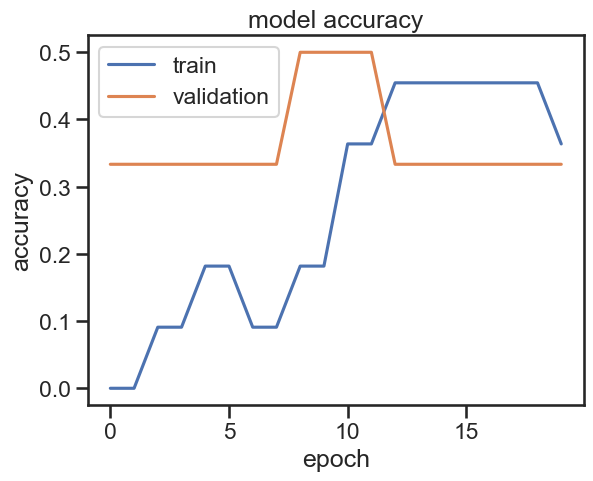

In [31]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc='upper left')
plt.show()

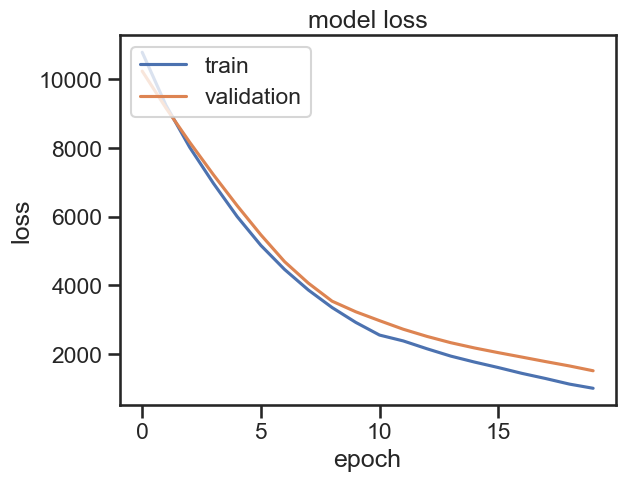

In [32]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc='upper left')
plt.show()

In [33]:
predictions = tri_one_model.predict(x_test)
predictions.round(1)

1/1 [==============================] - 0s 73ms/step


array([[0. , 1. , 0. , 0. ],
       [0. , 0. , 1. , 0. ],
       [0.2, 0.2, 0.3, 0.3],
       [0.2, 0.2, 0.3, 0.3],
       [0. , 0. , 1. , 0. ],
       [0.2, 0.2, 0.3, 0.3],
       [1. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. ]], dtype=float32)

In [34]:
np.rint(predictions)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

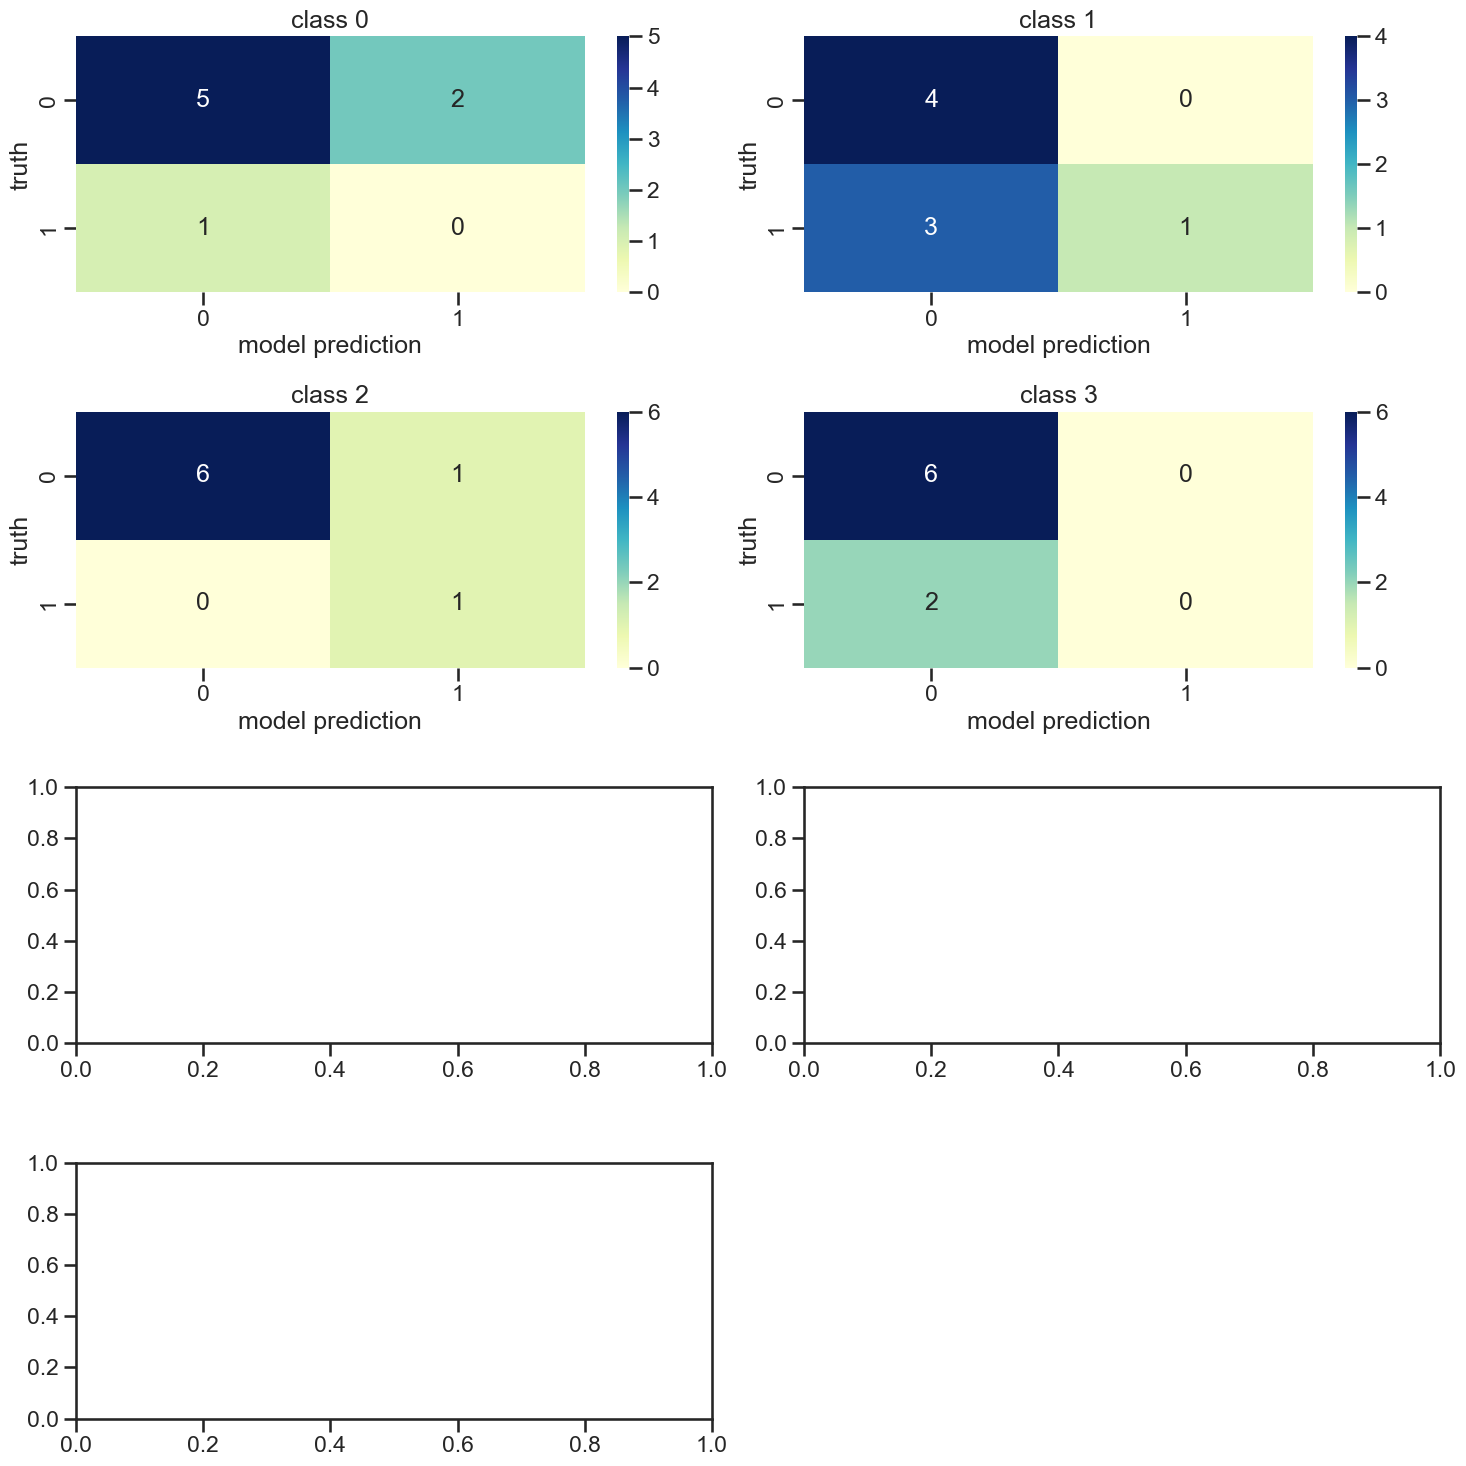

In [35]:
confusion_matrix = sklearn.metrics.multilabel_confusion_matrix(y_test, np.rint(predictions))
fig, ax = plt.subplots(4, 2, figsize=(15, 15))

for i in range(4):
    for j in range(2): 
        plot_num = (i*2)+j
        
        if plot_num < len(confusion_matrix):
            sns.heatmap(confusion_matrix[plot_num], annot=True, cmap="YlGnBu", ax=ax[i, j])
            ax[i, j].set_xlabel("model prediction")
            ax[i, j].set_ylabel("truth")
            ax[i, j].set_title(f"class {plot_num}")

plt.delaxes(ax=ax[i, j]) 
plt.tight_layout()
plt.show()

# second trimester data preparation 

In [36]:
second_trimester_diseases_df = pd.get_dummies(second_trimester_data["disease"])
second_trimester_data = second_trimester_data.drop("disease", axis = 1)
second_trimester_data = second_trimester_data.join(second_trimester_diseases_df)
second_trimester_data

## differential expression? how?

,0,1,2,3,4,5,6,7,8,9,...,57730,57731,57732,57733,57734,57735,Chronic-Hypertension,Gestational-Diabetes,Normal-Pregnancy,Preeclampsia
0,3,9,0,0,0,0,0,0,0,0,...,0,0,0,135,0,0,0,0,0,1
4,19,0,0,0,0,0,0,0,0,0,...,0,0,0,20,0,0,0,0,0,1
10,0,0,0,0,0,0,0,0,0,0,...,0,0,1,112,7,0,0,0,0,1
13,1,0,0,0,0,0,0,0,0,3,...,0,0,21,171,0,0,0,0,0,1
23,9,0,0,0,0,0,0,0,0,2,...,0,0,1,107,0,0,0,0,0,1
24,0,8,0,0,0,0,0,0,0,0,...,0,0,0,98,0,0,0,0,0,1
31,0,0,0,0,3,0,0,0,0,0,...,0,0,13,135,0,0,0,0,0,1
34,1,0,0,0,8,0,0,0,0,0,...,0,0,6,74,2,0,0,0,0,1
42,0,5,0,0,0,0,0,0,0,0,...,0,0,0,110,0,0,0,1,0,0
48,0,0,0,0,2,0,0,0,0,0,...,0,0,10,76,0,0,0,1,0,0


In [37]:
preeclampsia_secondT_top_lasso_genes = pd.read_csv("preeclampsia_secondT_top_lasso_genes.txt", sep="\t")
preeclampsia_secondT_top_lasso_genes = list(preeclampsia_secondT_top_lasso_genes['gene'])

gestational_diabetes_secondT_top_lasso_genes = pd.read_csv("gestational_diabetes_secondT_top_lasso_genes.txt", sep="\t")
gestational_diabetes_secondT_top_lasso_genes = list(gestational_diabetes_secondT_top_lasso_genes['gene'])

chronic_hypertension_secondT_top_lasso_genes = pd.read_csv("chronic_hypertension_secondT_top_lasso_genes.txt", sep="\t")
chronic_hypertension_secondT_top_lasso_genes = list(chronic_hypertension_secondT_top_lasso_genes['gene'])

secondT_top_lasso_genes = set(preeclampsia_secondT_top_lasso_genes + gestational_diabetes_secondT_top_lasso_genes + chronic_hypertension_secondT_top_lasso_genes)
secondT_top_lasso_genes

{'ENSG00000070756',
 'ENSG00000075624',
 'ENSG00000087086',
 'ENSG00000104765',
 'ENSG00000115993',
 'ENSG00000137154',
 'ENSG00000137460',
 'ENSG00000137818',
 'ENSG00000142541',
 'ENSG00000143546',
 'ENSG00000147403',
 'ENSG00000156508',
 'ENSG00000163220',
 'ENSG00000163359',
 'ENSG00000163736',
 'ENSG00000166710',
 'ENSG00000167658',
 'ENSG00000185201',
 'ENSG00000188536',
 'ENSG00000198034',
 'ENSG00000199415',
 'ENSG00000199480',
 'ENSG00000199994',
 'ENSG00000201098',
 'ENSG00000201321',
 'ENSG00000201822',
 'ENSG00000202198',
 'ENSG00000202354',
 'ENSG00000205542',
 'ENSG00000237973',
 'ENSG00000244734',
 'ENSG00000252316',
 'ENSG00000258486',
 'ENSG00000259001',
 'ENSG00000265150',
 'ENSG00000269028',
 'ENSG00000269900'}

In [38]:
second_trimester_data_tlg = second_trimester_data.T
second_trimester_data_tlg = second_trimester_data_tlg.join(genes)
second_trimester_data_tlg

,0,4,10,13,23,24,31,34,42,48,...,88,97,98,104,105,121,122,125,129,transcript
0,3,19,0,1,9,0,0,1,0,0,...,0,0,0,2,0,0,4,0,0,ENSG00000223972
1,9,0,0,0,0,8,0,0,5,0,...,0,0,0,1,0,0,0,0,0,ENSG00000227232
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000243485
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000237613
4,0,0,0,0,0,0,3,8,0,2,...,0,0,1,0,5,2,0,0,11,ENSG00000268020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000212932
Chronic-Hypertension,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,NaN
Gestational-Diabetes,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,NaN
Normal-Pregnancy,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,0,NaN


In [39]:
second_trimester_data_tlg = second_trimester_data_tlg[second_trimester_data_tlg["transcript"].isin(secondT_top_lasso_genes)]
second_trimester_data_tlg = second_trimester_data_tlg.drop("transcript", axis=1)
second_trimester_data_tlg = second_trimester_data_tlg.T
second_trimester_data_tlg

,36,3240,3243,4910,8605,9272,10789,11706,12108,13577,...,40425,41086,41108,42528,43310,43836,44658,52568,54494,54542
0,104,10122,6129,2443,9482,4822,171,12432,12600,15025,...,4080,93357,88955,3599,14296,2305,1084,3344,6335,2580
4,7,2252,612,2195,11814,5507,31,8314,8983,2834,...,1786,81712,83913,2085,2275,969,880,1395,4814,1011
10,342,2443,1221,4291,3181,2532,162,18594,16641,5513,...,3821,59676,54320,7684,6270,2138,1427,3033,5761,2801
13,12948,11299,4997,1415,1916,1793,1782,11140,11154,26578,...,5040,135422,134848,1649,64918,2179,1127,3224,7902,3067
23,105,3130,1294,35,6378,79,1382,1461,716,4974,...,921,96794,89301,883,5633,1510,2527,2110,5119,2014
24,208,2939,1241,222,2309,29,804,3194,1646,1861,...,1024,73890,72329,2314,3489,1860,2703,4417,6680,3080
31,212,12949,6680,3324,2429,8119,261,25273,29122,3945,...,5221,100082,92896,4763,4071,2545,2169,2728,7708,3090
34,41,2372,1195,4701,1552,1768,60,44674,47184,1570,...,1745,81717,87403,6937,2827,1348,1292,2036,4243,2160
42,134,2405,1240,2613,2137,10782,109,15072,15574,4624,...,1699,97517,105678,2756,5148,1544,1490,2506,5739,2117
48,109,3696,1396,2622,1025,6751,353,15387,17910,12040,...,1699,85332,94696,2874,12994,1273,458,1804,4351,1845


# second trimester neural network

In [60]:
Y = second_trimester_diseases_df
X = second_trimester_data_tlg

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [62]:
tri_two_model = Sequential()
tri_two_model.add(Dense(8, input_dim=x_train.shape[1], activation='relu'))
tri_two_model.add(Dense(8, activation='relu'))
tri_two_model.add(Dense(y_train.shape[1], activation='softmax'))
tri_two_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
history = tri_two_model.fit(x_train, y_train, validation_split=0.3, epochs=40, batch_size=5, verbose=0)

In [64]:
score = tri_two_model.evaluate(x_test, y_test, verbose=0)
score

[1.4025532007217407, 0.125]

# second trimester plots

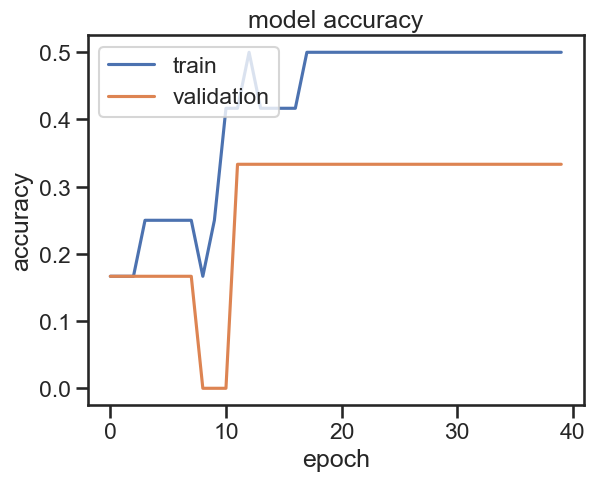

In [65]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc='upper left')
plt.show()

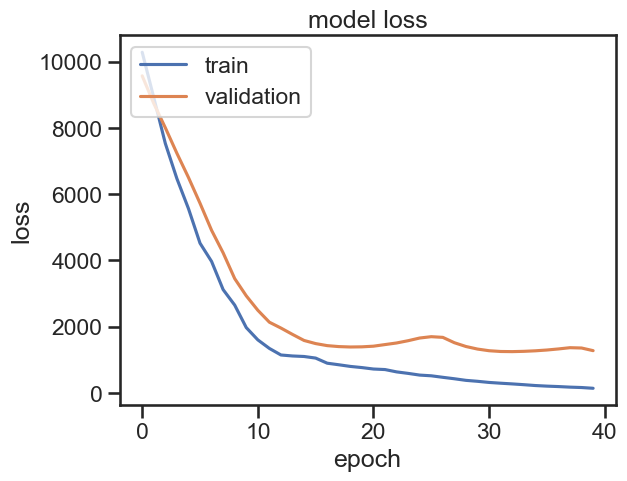

In [66]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc='upper left')
plt.show()

In [67]:
predictions = tri_two_model.predict(x_test)
predictions.round(1)

1/1 [==============================] - 0s 47ms/step


array([[0.2, 0.2, 0.3, 0.3],
       [0.2, 0.2, 0.3, 0.3],
       [0.2, 0.2, 0.3, 0.3],
       [0.2, 0.2, 0.3, 0.3],
       [0.2, 0.2, 0.3, 0.3],
       [0.2, 0.2, 0.3, 0.3],
       [0.2, 0.2, 0.3, 0.3],
       [0.2, 0.2, 0.3, 0.3]], dtype=float32)

In [68]:
np.rint(predictions)

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)

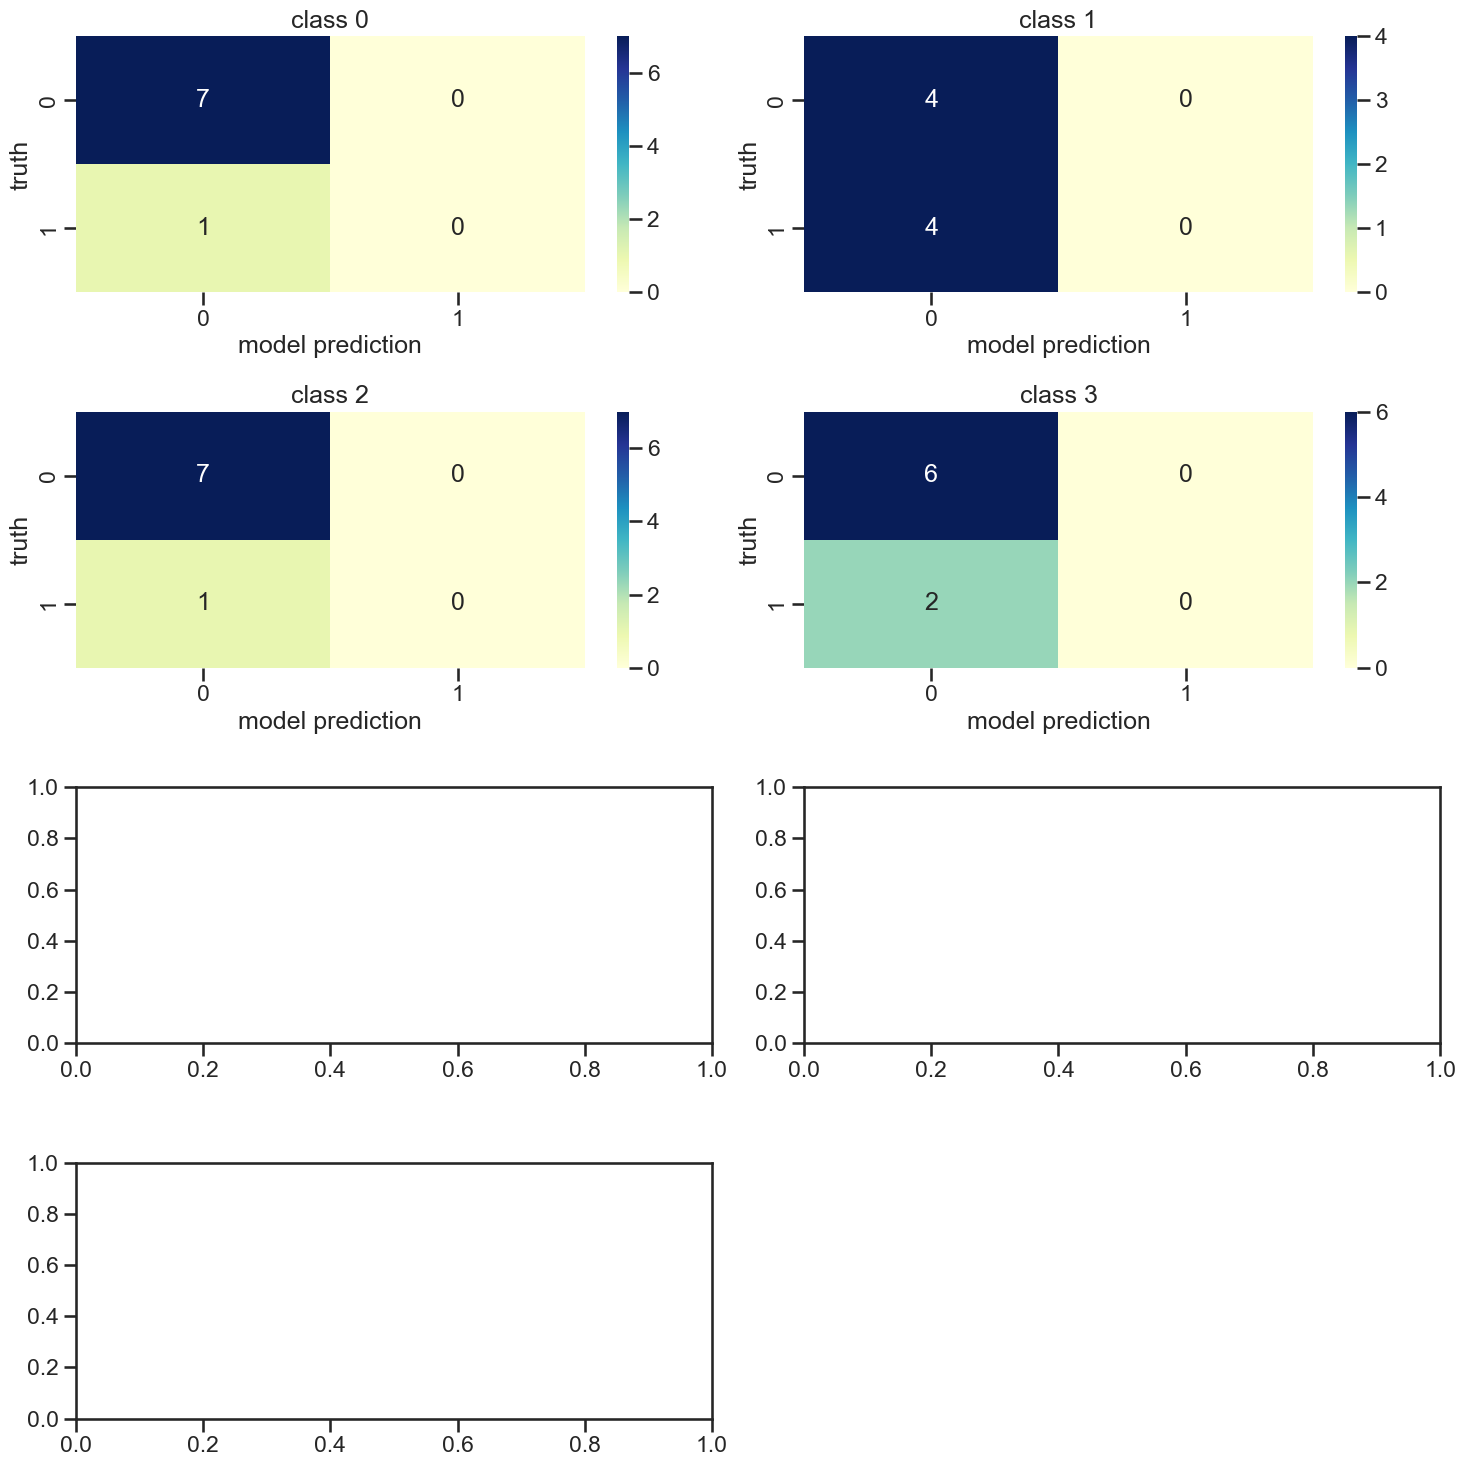

In [69]:
confusion_matrix = sklearn.metrics.multilabel_confusion_matrix(y_test, np.rint(predictions))
fig, ax = plt.subplots(4, 2, figsize=(15, 15))

for i in range(4):
    for j in range(2): 
        plot_num = (i*2)+j
        
        if plot_num < len(confusion_matrix):
            sns.heatmap(confusion_matrix[plot_num], annot=True, cmap="YlGnBu", ax=ax[i, j])
            ax[i, j].set_xlabel("model prediction")
            ax[i, j].set_ylabel("truth")
            ax[i, j].set_title(f"class {plot_num}")

plt.delaxes(ax=ax[i, j]) 
plt.tight_layout()
plt.show()

# third trimester data prep

In [70]:
third_trimester_diseases_df = pd.get_dummies(third_trimester_data["disease"])
third_trimester_data = third_trimester_data.drop("disease", axis = 1)
third_trimester_data = third_trimester_data.join(third_trimester_diseases_df)
third_trimester_data

## differential expression? how?

,0,1,2,3,4,5,6,7,8,9,...,57730,57731,57732,57733,57734,57735,Chronic-Hypertension,Gestational-Diabetes,Normal-Pregnancy,Preeclampsia
11,0,0,0,0,0,0,0,3,0,0,...,0,0,3,46,1,0,0,0,0,1
12,0,0,1,0,5,0,0,2,0,2,...,0,1,9,127,0,0,0,0,0,1
14,0,4,0,0,0,0,0,0,0,0,...,0,0,0,213,3,0,0,0,0,1
15,1,0,0,0,2,0,0,0,0,2,...,0,0,11,123,0,0,0,0,0,1
29,0,1,0,0,0,5,1,2,0,0,...,0,4,13,74,10,0,0,0,0,1
33,0,0,0,0,0,0,0,0,0,0,...,0,0,6,175,0,0,0,0,0,1
35,34,2,0,0,0,0,0,0,0,4,...,0,0,1,109,1,0,0,0,0,1
36,0,0,0,0,0,0,0,0,0,2,...,0,0,1,122,0,0,0,0,0,1
40,1,0,0,0,0,0,0,0,0,0,...,0,0,3,71,0,0,0,1,0,0
46,2,8,0,0,0,0,0,0,0,0,...,0,0,0,116,0,0,0,1,0,0


In [71]:
preeclampsia_thirdT_top_lasso_genes = pd.read_csv("preeclampsia_thirdT_top_lasso_genes.txt", sep="\t")
preeclampsia_thirdT_top_lasso_genes = list(preeclampsia_thirdT_top_lasso_genes['gene'])

gestational_diabetes_thirdT_top_lasso_genes = pd.read_csv("gestational_diabetes_thirdT_top_lasso_genes.txt", sep="\t")
gestational_diabetes_thirdT_top_lasso_genes = list(gestational_diabetes_thirdT_top_lasso_genes['gene'])

chronic_hypertension_thirdT_top_lasso_genes = pd.read_csv("chronic_hypertension_thirdT_top_lasso_genes.txt", sep="\t")
chronic_hypertension_thirdT_top_lasso_genes = list(chronic_hypertension_thirdT_top_lasso_genes['gene'])

thirdT_top_lasso_genes = set(preeclampsia_thirdT_top_lasso_genes + gestational_diabetes_thirdT_top_lasso_genes + chronic_hypertension_thirdT_top_lasso_genes)
thirdT_top_lasso_genes

{'ENSG00000008988',
 'ENSG00000061455',
 'ENSG00000070756',
 'ENSG00000075624',
 'ENSG00000087086',
 'ENSG00000100316',
 'ENSG00000104765',
 'ENSG00000105835',
 'ENSG00000108298',
 'ENSG00000110700',
 'ENSG00000112096',
 'ENSG00000115993',
 'ENSG00000118113',
 'ENSG00000122406',
 'ENSG00000122566',
 'ENSG00000122862',
 'ENSG00000124491',
 'ENSG00000130600',
 'ENSG00000133112',
 'ENSG00000133742',
 'ENSG00000137076',
 'ENSG00000137154',
 'ENSG00000138071',
 'ENSG00000138293',
 'ENSG00000138326',
 'ENSG00000142534',
 'ENSG00000142541',
 'ENSG00000143546',
 'ENSG00000143947',
 'ENSG00000144713',
 'ENSG00000145592',
 'ENSG00000147403',
 'ENSG00000150681',
 'ENSG00000154146',
 'ENSG00000155657',
 'ENSG00000156508',
 'ENSG00000158710',
 'ENSG00000161016',
 'ENSG00000163220',
 'ENSG00000163359',
 'ENSG00000163563',
 'ENSG00000163736',
 'ENSG00000163737',
 'ENSG00000166710',
 'ENSG00000167526',
 'ENSG00000174444',
 'ENSG00000177954',
 'ENSG00000183508',
 'ENSG00000184009',
 'ENSG00000187109',


In [72]:
third_trimester_data_tlg = third_trimester_data.T
third_trimester_data_tlg = third_trimester_data_tlg.join(genes)
third_trimester_data_tlg

,11,12,14,15,29,33,35,36,40,46,...,96,101,102,106,107,112,115,127,131,transcript
0,0,0,0,1,0,0,34,0,1,2,...,0,0,20,0,0,1,0,0,0,ENSG00000223972
1,0,0,4,0,1,0,2,0,0,8,...,2,2,2,0,1,0,0,0,2,ENSG00000227232
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000243485
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000237613
4,0,5,0,2,0,0,0,0,0,0,...,0,0,0,10,0,0,0,0,3,ENSG00000268020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000212932
Chronic-Hypertension,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,NaN
Gestational-Diabetes,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,NaN
Normal-Pregnancy,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,0,NaN


In [73]:
third_trimester_data_tlg = third_trimester_data_tlg[third_trimester_data_tlg["transcript"].isin(thirdT_top_lasso_genes)]
third_trimester_data_tlg = third_trimester_data_tlg.drop("transcript", axis=1)
third_trimester_data_tlg = third_trimester_data_tlg.T
third_trimester_data_tlg

,35,2225,2709,3240,3243,3287,3516,3557,4201,4910,...,43310,43769,44658,46949,48399,49781,54494,54542,54547,56691
11,22,786,308,664,235,558,179,275,156,1054,...,1381,1019,386,973,822,912,3518,823,621,1088
12,146,1234,485,6551,5398,1276,1009,1043,2593,921,...,17641,2160,249,1557,2052,2779,4621,2146,1403,1975
14,12,1840,1260,22704,10136,2319,2305,2013,891,1310,...,6696,3364,893,3322,2891,5683,8742,3932,2355,3169
15,93,1823,900,4572,2891,2492,701,1137,1105,2384,...,7943,2807,913,2458,3051,2838,7225,3086,2225,2874
29,28,481,324,830,364,682,197,194,157,637,...,928,780,536,858,967,884,2713,1078,536,1046
33,213,2293,962,31298,12568,2506,3152,2406,7949,750,...,36859,3832,530,2711,3972,6194,11499,3448,2721,3449
35,128,1345,147,3042,1232,1322,667,1824,2778,50,...,14527,2046,1088,1510,1871,2626,5055,1618,1291,1946
36,77,1652,822,6709,3192,2129,1098,1277,2366,245,...,12862,2919,3144,2347,2323,2759,7641,2267,2390,2966
40,11,830,1316,1413,690,903,444,2786,3782,1906,...,42604,1388,1338,1088,1315,1993,4118,1499,874,1404
46,176,1784,3032,2285,1145,1882,601,3409,5415,132,...,30974,2743,7378,2360,2351,3216,7761,2248,1741,3169


# third trimester neural network

In [86]:
Y = third_trimester_diseases_df
X = third_trimester_data_tlg

In [87]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [88]:
tri_three_model = Sequential()
tri_three_model.add(Dense(8, input_dim=x_train.shape[1], activation='relu'))
tri_three_model.add(Dense(8, activation='relu'))
tri_three_model.add(Dense(y_train.shape[1], activation='softmax'))
tri_three_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [89]:
history = tri_three_model.fit(x_train, y_train, validation_split=0.3, epochs=20, batch_size=5, verbose=0)

In [90]:
score = tri_three_model.evaluate(x_test, y_test, verbose=0)
score

[977.55078125, 0.375]

# third trimester plots

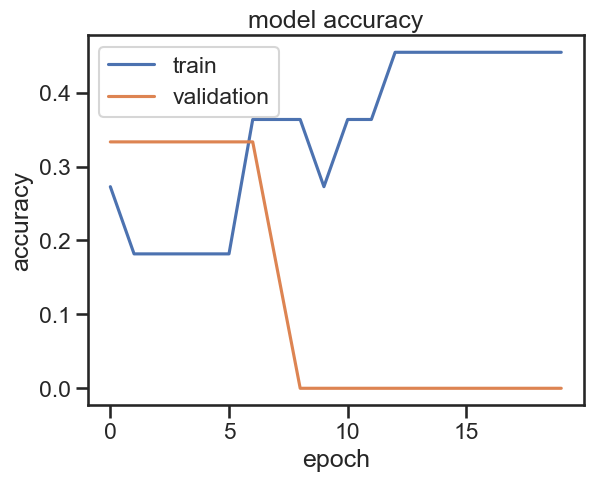

In [91]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc='upper left')
plt.show()

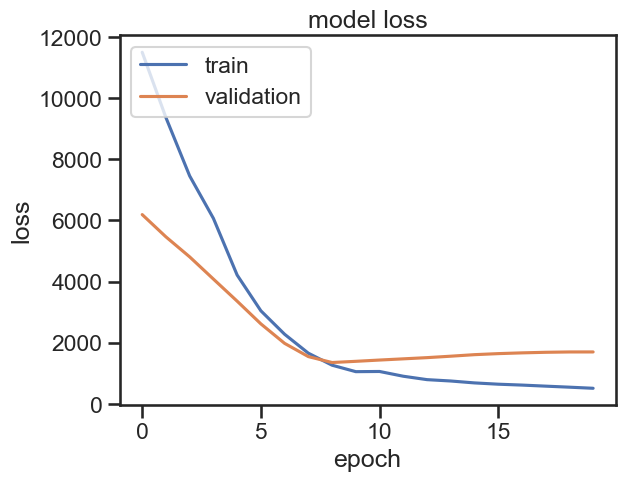

In [92]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc='upper left')
plt.show()

In [93]:
predictions = tri_three_model.predict(x_test)
predictions.round(1)

1/1 [==============================] - 0s 49ms/step


array([[1. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. ],
       [0. , 0.1, 0.9, 0. ],
       [0. , 0. , 1. , 0. ],
       [0. , 1. , 0. , 0. ],
       [0. , 0. , 0. , 1. ],
       [0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. ]], dtype=float32)

In [94]:
np.rint(predictions)

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

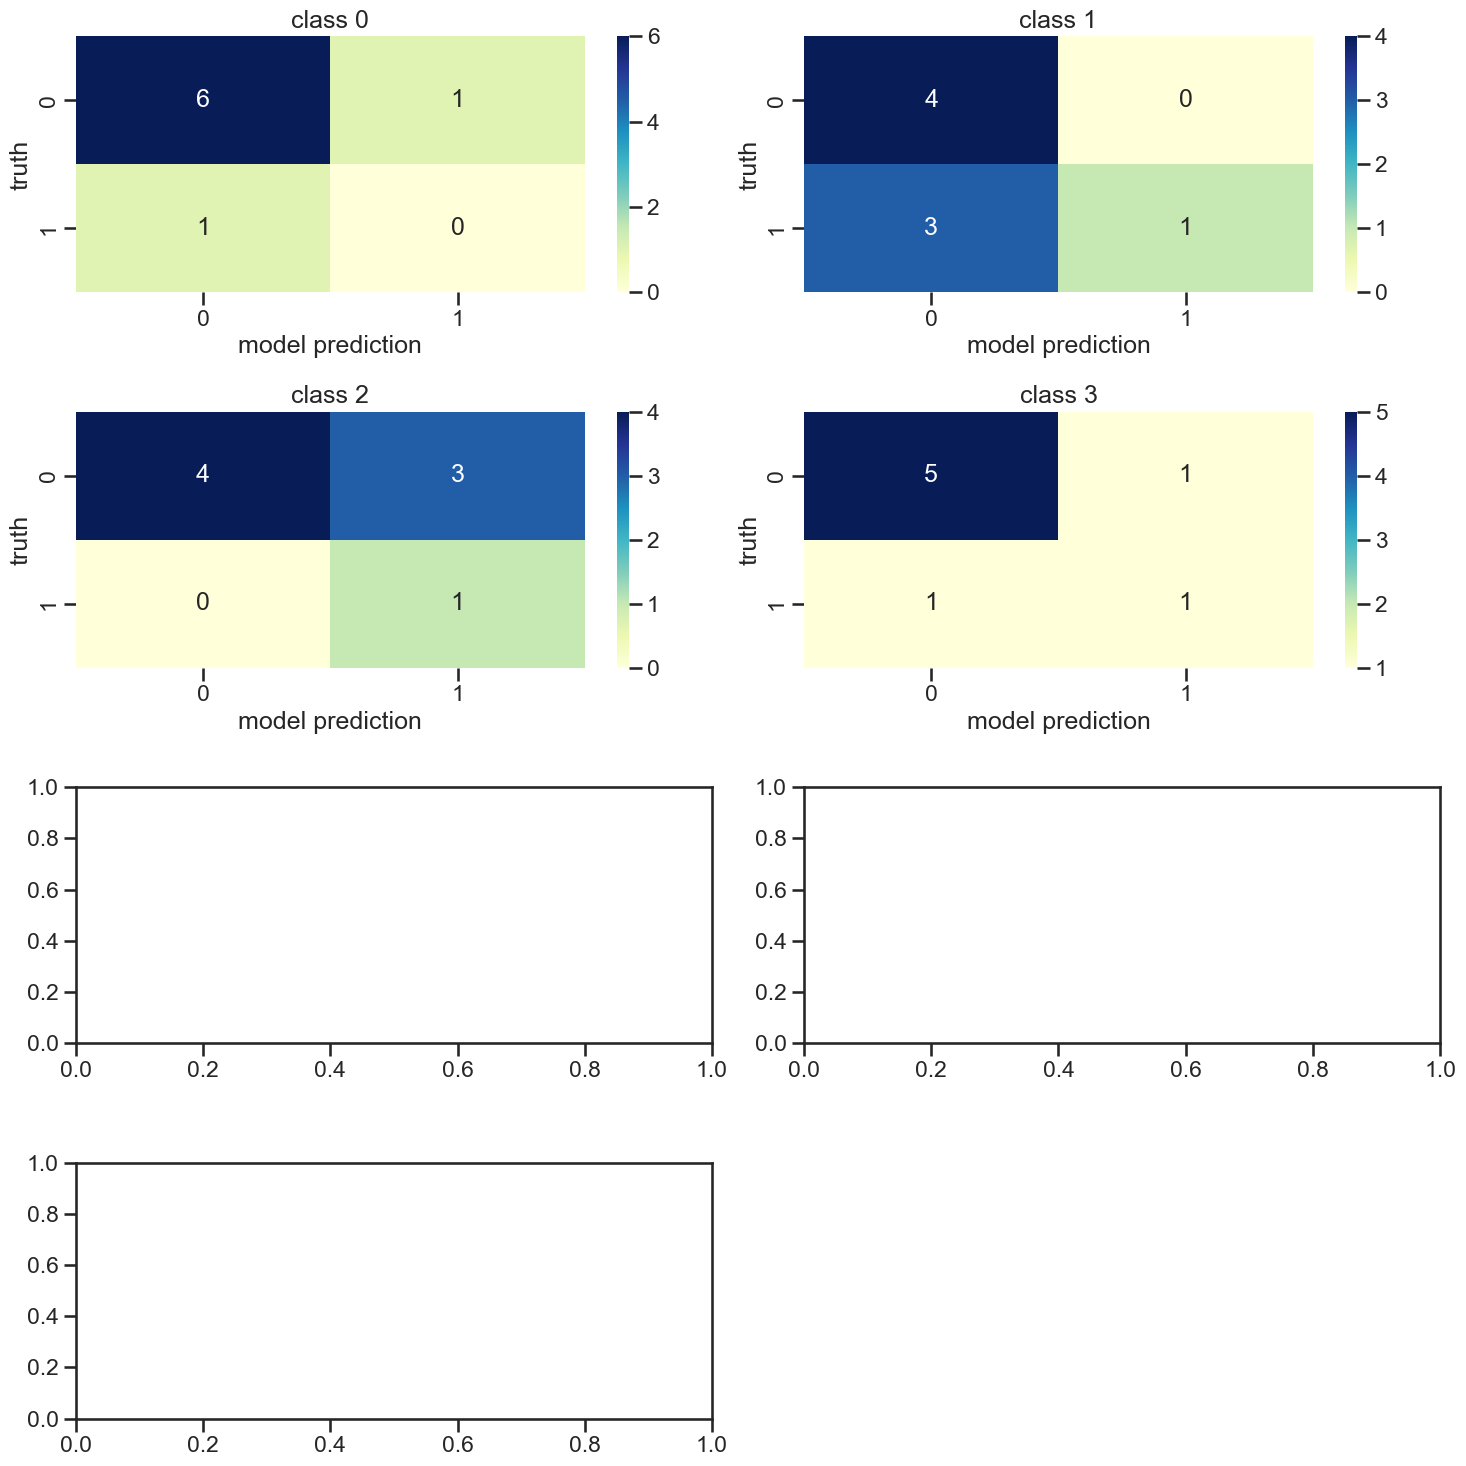

In [95]:
confusion_matrix = sklearn.metrics.multilabel_confusion_matrix(y_test, np.rint(predictions))
fig, ax = plt.subplots(4, 2, figsize=(15, 15))

for i in range(4):
    for j in range(2): 
        plot_num = (i*2)+j
        
        if plot_num < len(confusion_matrix):
            sns.heatmap(confusion_matrix[plot_num], annot=True, cmap="YlGnBu", ax=ax[i, j])
            ax[i, j].set_xlabel("model prediction")
            ax[i, j].set_ylabel("truth")
            ax[i, j].set_title(f"class {plot_num}")

plt.delaxes(ax=ax[i, j]) 
plt.tight_layout()
plt.show()

# feature importance

In [189]:
explainer = shap.KernelExplainer(model.predict, shap.sample(x_train, 100))
shap_values = explainer.shap_values(x_test, nsamples=100)

1/1 [==============================] - 0s 42ms/step


  0%|          | 0/7 [00:00<?, ?it/s]

57/57 [==============================] - 1s 6ms/step


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=1.289e-02, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 21 iterations, i.e. alpha=5.414e-03, with an active set of 7 regressor

Regressors in active set degenerate. Dropping a regressor, after 26 iterations, i.e. alpha=5.119e-03, with an active set of 10 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 26 iterations, i.e. alpha=5.119e-03, with an active set of 10 regressors, and the smallest cholesky pivot element being 2.581e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 26 iterations, i.e. alpha=5.119e-03, with an active set of 10 regressors, and the smallest cholesky pivot element being 2.356e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 26 iterations, i.e. alpha=5.118e-03, with an active set of 10 regressors, and the smallest cholesky pivot element being 3.799e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dro

ValueError: You are using LassoLarsIC in the case where the number of samples is smaller than the number of features. In this setting, getting a good estimate for the variance of the noise is not possible. Provide an estimate of the noise variance in the constructor.

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], 
                pd.DataFrame(x_test).iloc[0,:])

In [ ]:
shap.force_plot(explainer.expected_value[2], shap_values[2], x_test)

In [ ]:
shap.summary_plot(shap_values, X)